# 6.2 Exercise: Titanic Case Study Part 1
author: Rachel Nelson

class: DSC550-T302 Data Mining (2215-1)

# Milestone 1: Narrative

### Avocado Market

In this scenario, I am helping an avocado farmer predict what the prices of avocados will be in order to help with budgeting and forecasting. I want to see if there are specific “tells” or levers and pulls that can be used to predict when pricing will change. By knowing this information, I would be able to determine when and how avocado prices fluctuate, which would be helpful to the farmer. This scenario will use the data set “avocado” which is available on Kaggle at https://www.kaggle.com/neuromusic/avocado-prices.
I will be looking at 13 different features which include the date, average prices, total volume, total numbers of avocados with PLU 4046 sold, total numbers of avocados with PLU 4225 sold, Total number of avocados with PLU 4770 sold, total bags, total small bags, and total large bags, total extra large bags, avocado type, year and region.


#### Questions that might help me predict avocado prices:

1. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

2. Are the numerical variables correlated?

3. What are the distributions among regions and types?

4. How do conventional avocado sales compare to organic?

5. How to avocado prices fluctuate over time?

6. How does region or type impact avocado sales?

# Milestone 1: graphical analysis creating a minimum of four graphs

In [33]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import Rank2D

In [12]:
#Load the data
data = "C:/Users/emera/Downloads/avocado/avocado.csv"
data = pd.read_csv("C:/Users/emera/Downloads/avocado/avocado.csv")

In [13]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (18249, 14)


In [14]:
#Step 3:  Look at the data
print(data.head(5))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [15]:
#4.	Think about some questions that might help you predict who will survive:
#a.	What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
print("Variable Information")
data.info()

Variable Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [21]:
#b.	Are the numerical variables correlated?
print("Correlation Matrix")
data.corr()

Correlation Matrix


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

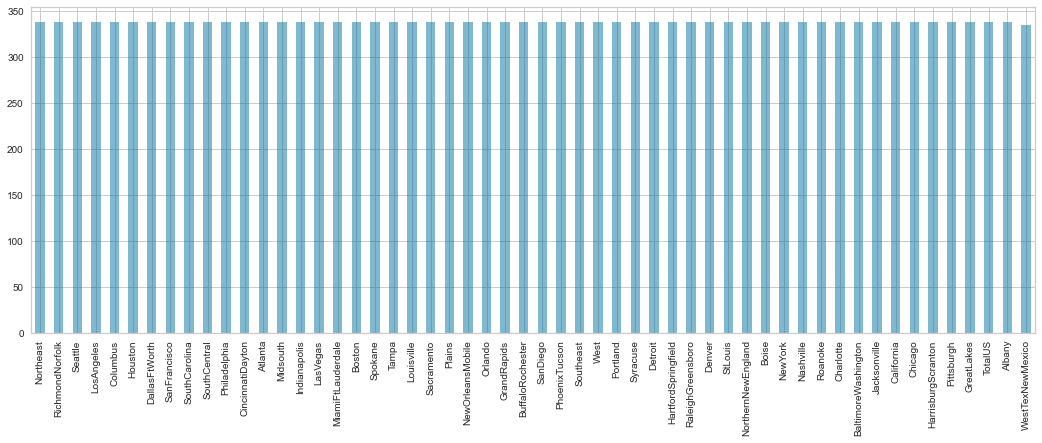

In [17]:
# Are the distributions of numerical variables the same or different among regions?
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure
data.region.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

<AxesSubplot:>

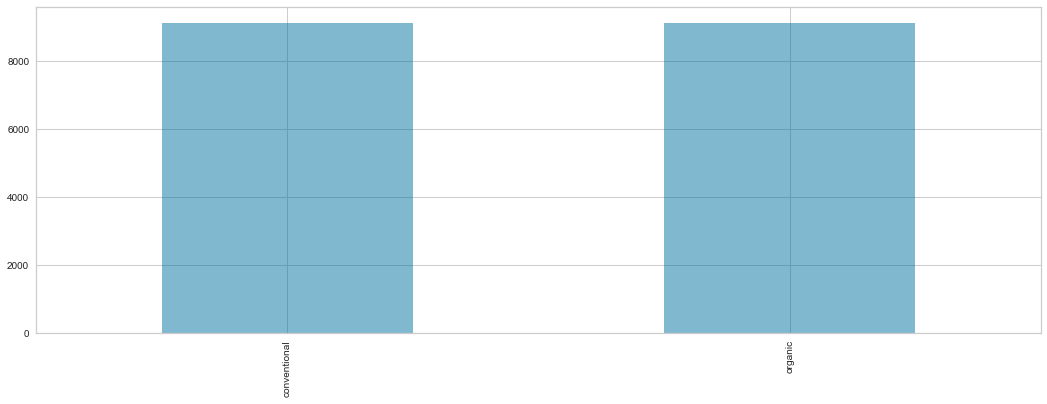

In [20]:
# Are the distributions of numerical variables the same or different among different types?
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure
data.type.value_counts().plot(kind="bar",alpha=0.5)  #

In [24]:
#5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

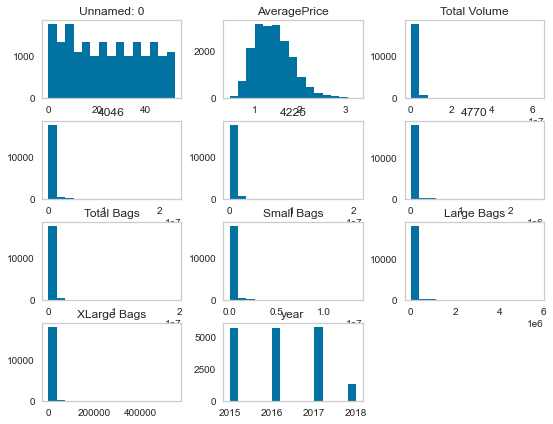

In [26]:
# histograms
data.hist(bins=15,figsize=(9,7),grid=False)

Text(0.5, 1.0, 'Observations by Type')

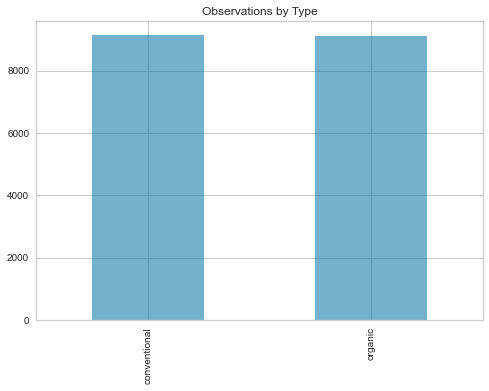

In [27]:
#7.	Bar charts for variables
data.type.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Observations by Type")

Text(0.5, 1.0, 'Observations by Year')

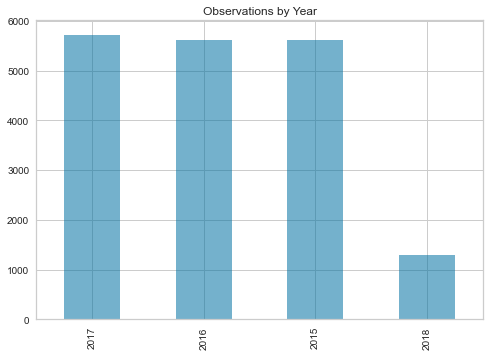

In [28]:
data.year.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Observations by Year")


Text(0.5, 1.0, 'Observations by Region')

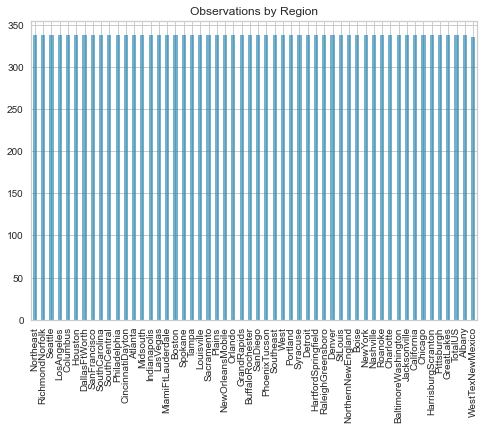

In [29]:
data.region.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Observations by Region")


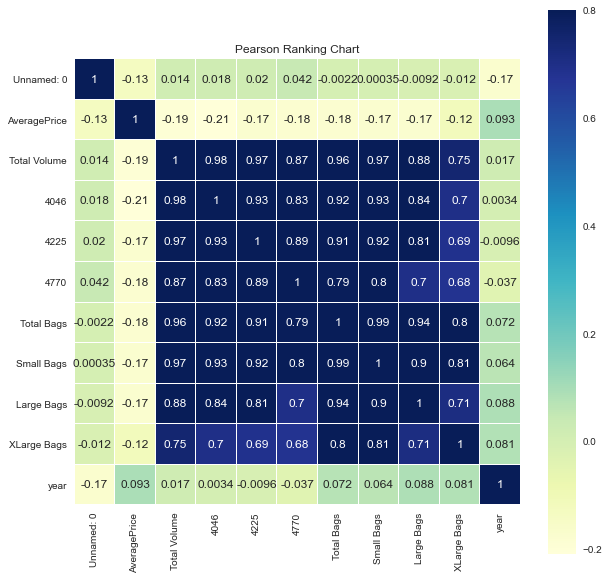

In [30]:
#8.	To see if the data is correlated, make some Pearson Ranking charts
corr=data.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Pearson Ranking Chart');
#a.	Notice that in my sample code, I have saved this png file.
#b.	The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.

In [34]:
num_features = ['Total Volume', 'AveragePrice', 'Total Bags', 'year']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
X = data[num_features].to_numpy()

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

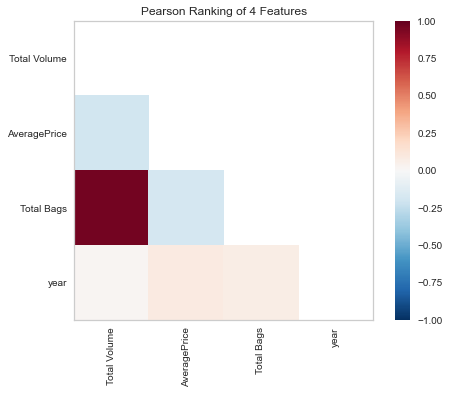

In [35]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="d://covariance1.png") # Draw/show/poof the data
#plt.show()

In [ ]:
#9.	 Use Parallel Coordinates visualization to compare the distributions of numerical variables between organic and conventional

In [47]:
# import packages
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
set_palette('sns_bright')

In [48]:
# Specify the features of interest and the classes of the target
data.loc[data['type'] == 'conventional','type_1'] = 1
data.loc[data['type'] == 'organic','type_1'] = 0
print(data.head(5))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  type_1  
0  2015  Albany     1.0  
1  2015  Albany     1.0  
2 

In [49]:
classes = ['conventional', 'organic']
num_features = ['Total Volume', 'AveragePrice', 'Total Bags', 'year']

In [50]:
# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

In [51]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.type.to_numpy()

In [52]:
# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

In [58]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="d://avocadocoords3.png") # Draw/show/poof the data
plt.show()


<Figure size 576x396 with 0 Axes>

###  Graphical Analysis Conclusion:

#### Distribution
The data looks even distributed among different types and regions.
The data does not look like it includes more then a quarter of 2018 when looking at the distribution by year

#### Correlation
There are no high correlations associated with the average price.
There are high correlations between total volume, PLU's, and number of bags, which is expected since they are all volume metrics.

#### Parallel Coordinates